# Required Application task for Starmind Application

In this dataset of dog names in Zurich (
https://data.stadt-zuerich.ch/dataset/sid_stapo_hundenamen/download/20210103_hundenamen.csv Last updated June 16th 2021), find all names that have a Levenshtein distance of 1 to "Luca". 

Expected output:
Write your answer here (comma-separated names, in any order).

## Preparation

Loading of necessary libraries.

In [1]:
import sys
!{sys.executable} -m pip install python-Levenshtein

In [2]:
import os
import pandas as pd
from functools import partial
import Levenshtein

## Data Loading

We load it with Pandas.

In [3]:
df = pd.read_csv(os.path.join('.', '20210103_hundenamen.csv'))

In [4]:
df.head()

,HUNDENAME,GEBURTSJAHR_HUND,GESCHLECHT_HUND
0,Ituma,2011,w
1,"""Bo"" Bendy of Treegarden",2020,m
2,"""Bobby"" Lord Sinclair",2009,m
3,"""Buddy"" Fortheringhay's J.",2011,m
4,"""Fly"" Showring i fly for you",2015,w


## Data Profiling

How many records do we have?

In [5]:
df.HUNDENAME.shape[0]

8574

How many names do have?

In [6]:
df.HUNDENAME.describe()

count     8574
unique    5192
top       Luna
freq        92
Name: HUNDENAME, dtype: object

How long are our names?

<AxesSubplot:>

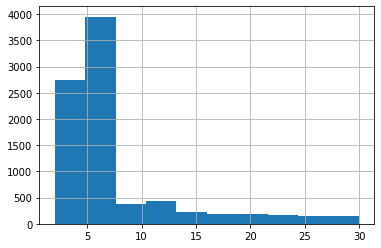

In [7]:
df.HUNDENAME.apply(len).hist()

We have some long names in here. Let's have a look at them. Just to make sure we are not missing anything.

In [8]:
df[df.HUNDENAME.apply(len) > 25].HUNDENAME.unique()

array(['"Buddy" Fortheringhay\'s J.', '"Fly" Showring i fly for you',
       '"Zappalla II" Kora v. Tüfibach', 'A great Dream Kajsa of Moss-La',
       'Akando-Abucco v. Ritters Glück', 'Akela Sugar Dogs v. Donaugart.',
       "Akosambo's Black Massai Ulani", 'Algarvio (Casa Rastys Amigo)',
       'Alles Liebe Ava mein Rheingold', 'Aly von den Sarazenentürmen',
       "Amelia's Angels Your Love Is D", 'Amy (Skyligth of Sherry Lane)',
       'Anakin Skywalker von Glönigen', 'Anna (chilchil v Montfortwald)',
       'Ardey Kahlo vom Kermelberg', "Ariel (Paperlapap's Joker)",
       'Armani the Limited Edition', 'Aro (Tomba v. Försterhaus)',
       'Axel von Burg Schwärtzenberg', 'Babu (Udo von Tannenthalbad)',
       'Bakonyi-Dròtos Indigo-Rusty', 'Baltic Success Princess Kira',
       'Baslis Hermes vom Moosacher', 'Berenice v. Happy Morning Star',
       'Betty-Fibi von der Landruh', 'Billie Red Starlight Girl von',
       'Bircan du bosquet des muguets', "Birla (Herder little Devil's)"

So there seems to be a lot of information encoded in the name field. Probably also nicknames of the dogs. 
But since we are missing documentation of the dataset, we cannot be for sure.
For now we will stick with whatever we have.

## Define Helper

Let's define a helper function.

In [9]:
get_distance_to_luca = partial(Levenshtein.distance, 'Luca')

## Calculate distance from names

We can apply this function to each row.

In [10]:
df['distance_to_luca'] = df.HUNDENAME.apply(get_distance_to_luca)

## Get relevant names

We are looking for the names that have a distance of 1 to Luca in a comma-seperated list.

In [11]:
names = df[df.distance_to_luca == 1].HUNDENAME.unique()

These are our names:

In [12]:
print(','.join(names.tolist()))

Cuca,Lua,Luba,Lucas,Luce,Lucia,Lucy,Lula,Luma,Luna,Lupa,Yuca
